# Regression

This is a series of basic examples for running linear regression with StatWrap. It's more typical to use a package like sklearn or statsmodels for regression, but StatWrap is written to imitate Google Sheets/Excel. 

## Imports

Run the typical three starter lines in a Google Colab (suggested) or Jupyter notebook. 

In [1]:
!pip install --upgrade statwrap
import statwrap
%use_all

  Obtaining dependency information for statwrap from https://files.pythonhosted.org/packages/27/94/a4742d0e596e1c3bb6adb9affd78738a77eb45705c961f702dcfc9ebd00f/StatWrap-0.2.14-py3-none-any.whl.metadata
  Attempting uninstall: statwrap
    Found existing installation: StatWrap 0.2.13
    Uninstalling StatWrap-0.2.13:
      Successfully uninstalled StatWrap-0.2.13


## Example 1 

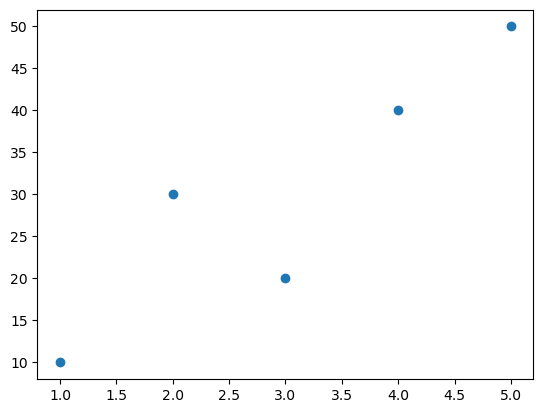

Correlation: 0.8999999999999999


In [11]:
x = 1, 2, 3, 4, 5
y = 10, 30, 20, 40, 50

scatter_plot(x,y)

print('Correlation:', correl(x,y))

In [12]:
# Direct Estimation

regression_line = linest(y, x)
regression_line

In [13]:
# predict y for x = 1 and x = 2

regression_line(1), regression_line(2)

(12.000000000000009, 21.000000000000007)

In [14]:
# Use correlation

correlation = correl(x,y)
sd_x = sd(x)
sd_y = sd(y)

slope = correlation * sd_y/sd_x

# y_average = intercept + slope*x_average 
intercept = average(y) - slope*average(x)

print(f'predicted Y = {intercept} + {slope}*X')

predicted Y = 3.0 + 9.0*X


## Example 2 - Read from CSV

Now we import a package called pandas to import data. 

In [16]:
url = 'https://raw.githubusercontent.com/alexanderthclark/Stats1101/main/Data/FatherSonHeights/pearson.csv'

# load a DataFrame
df = pd.read_csv(url)

# inp
df.head()